# Liên kết drive và import các thư viện cần thiết

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import pandas as pd
from sklearn import svm, metrics

# Đọc dữ liệu từ drive

In [4]:
# Lấy đường dẫn đến các file csv
link_X_train = '/content/drive/MyDrive/My Data/Save_Data/X_train_HOG.csv'
link_Y_train = '/content/drive/MyDrive/My Data/Save_Data/Y_train_HOG.csv'
link_X_vali = '/content/drive/MyDrive/My Data/Save_Data/X_val_HOG.csv'
link_Y_vali = '/content/drive/MyDrive/My Data/Save_Data/Y_val_HOG.csv'
link_X_test = '/content/drive/MyDrive/My Data/Save_Data/X_test_HOG.csv'
link_Y_test = '/content/drive/MyDrive/My Data/Save_Data/Y_test_HOG.csv'

In [5]:
# Đọc và chuyển dữ liệu sang ndarray
X_train = pd.read_csv(link_X_train,header=None).to_numpy()
Y_train = pd.read_csv(link_Y_train,header=None).to_numpy()
X_vali = pd.read_csv(link_X_vali,header=None).to_numpy()
Y_vali = pd.read_csv(link_Y_vali,header=None).to_numpy()
X_test = pd.read_csv(link_X_test,header=None).to_numpy()
Y_test = pd.read_csv(link_Y_test,header=None).to_numpy()

In [ ]:
# Kích thước dữ liệu
print("Tập train: ", len(X_train),len(Y_train))
print("Tập validation: ", len(X_vali),len(Y_vali))
print("Tập test: ", len(X_test),len(Y_test))

Tập train:  20740 20740
Tập validation:  5229 5229
Tập test:  3512 3512


In [6]:
labels = os.listdir('/content/drive/MyDrive/My Data/Do_An_Images')
labels = sorted(labels)
print(labels)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


#Chỉnh size các khung hiển thị confusion matrix

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,20

#**Train Model**







###Model Bernouli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_BNB = BernoulliNB()
model_BNB.fit(X_train, Y_train)
y_pred_vali = model_BNB.predict(X_vali)
y_pred_test = model_BNB.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print('\n')
cm = plot_confusion_matrix(model_BNB,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_BNB,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

###Model Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LG = LogisticRegression(C = 0.1, max_iter=1000)
model_LG.fit(X_train, Y_train)
y_pred_vali = model_LG.predict(X_vali)
y_pred_test = model_LG.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.6662841843564735




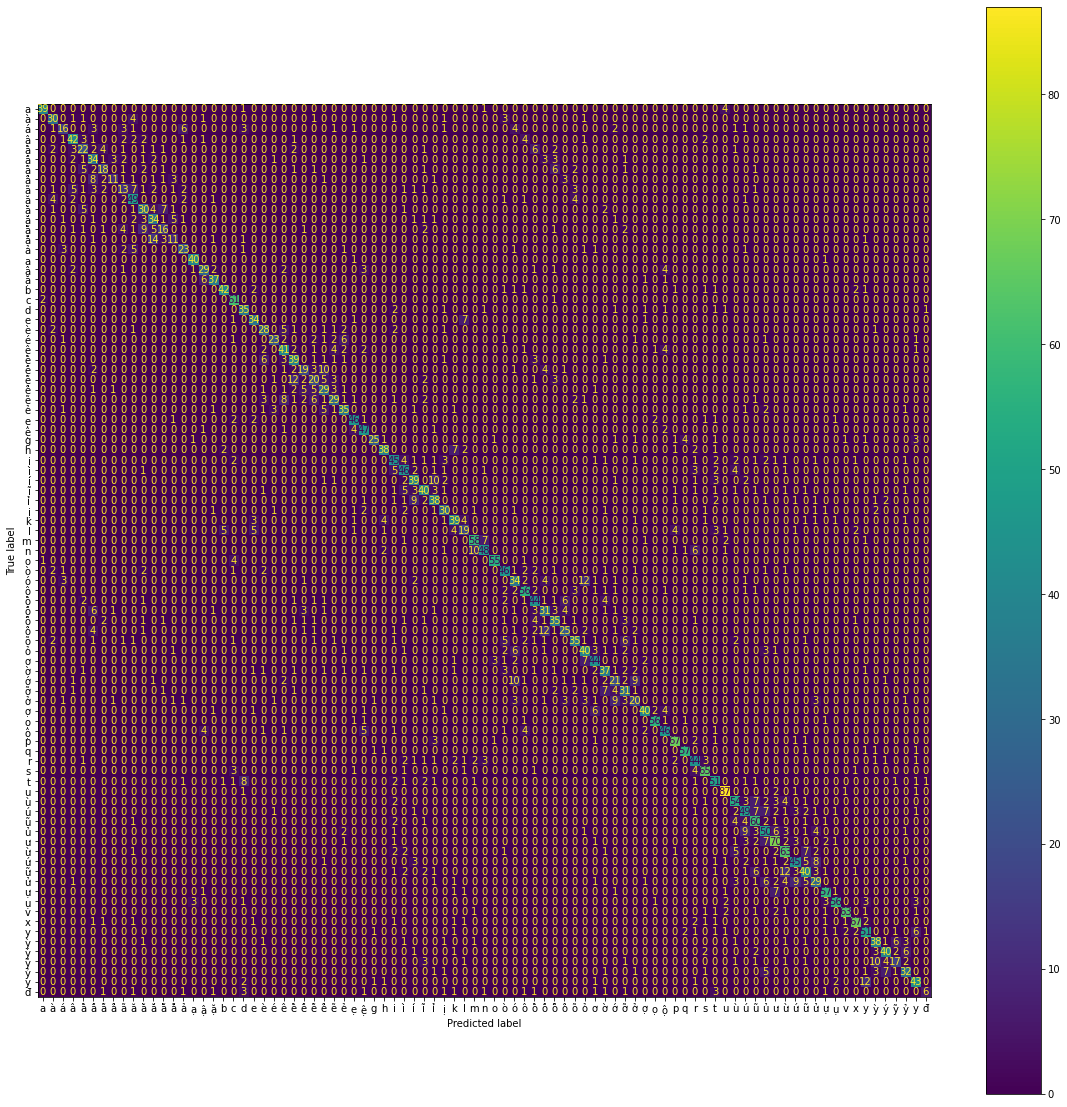

              precision    recall  f1-score   support

           a       0.93      0.87      0.90        45
          à       0.67      0.68      0.67        44
          á       0.57      0.36      0.44        44
          â       0.69      0.67      0.68        63
         ầ       0.51      0.45      0.48        49
         ấ       0.49      0.62      0.54        55
         ẫ       0.56      0.43      0.49        42
         ẩ       0.65      0.33      0.44        33
          ã       0.39      0.29      0.33        45
          ă       0.62      0.73      0.67        67
         ằ       0.54      0.58      0.56        52
         ắ       0.53      0.65      0.59        52
         ẵ       0.50      0.36      0.42        44
         ẳ       0.46      0.34      0.39        32
          ả       0.61      0.59      0.60        39
          ạ       0.89      0.95      0.92        42
         ậ       0.67      0.63      0.65        46
         ặ       0.80    

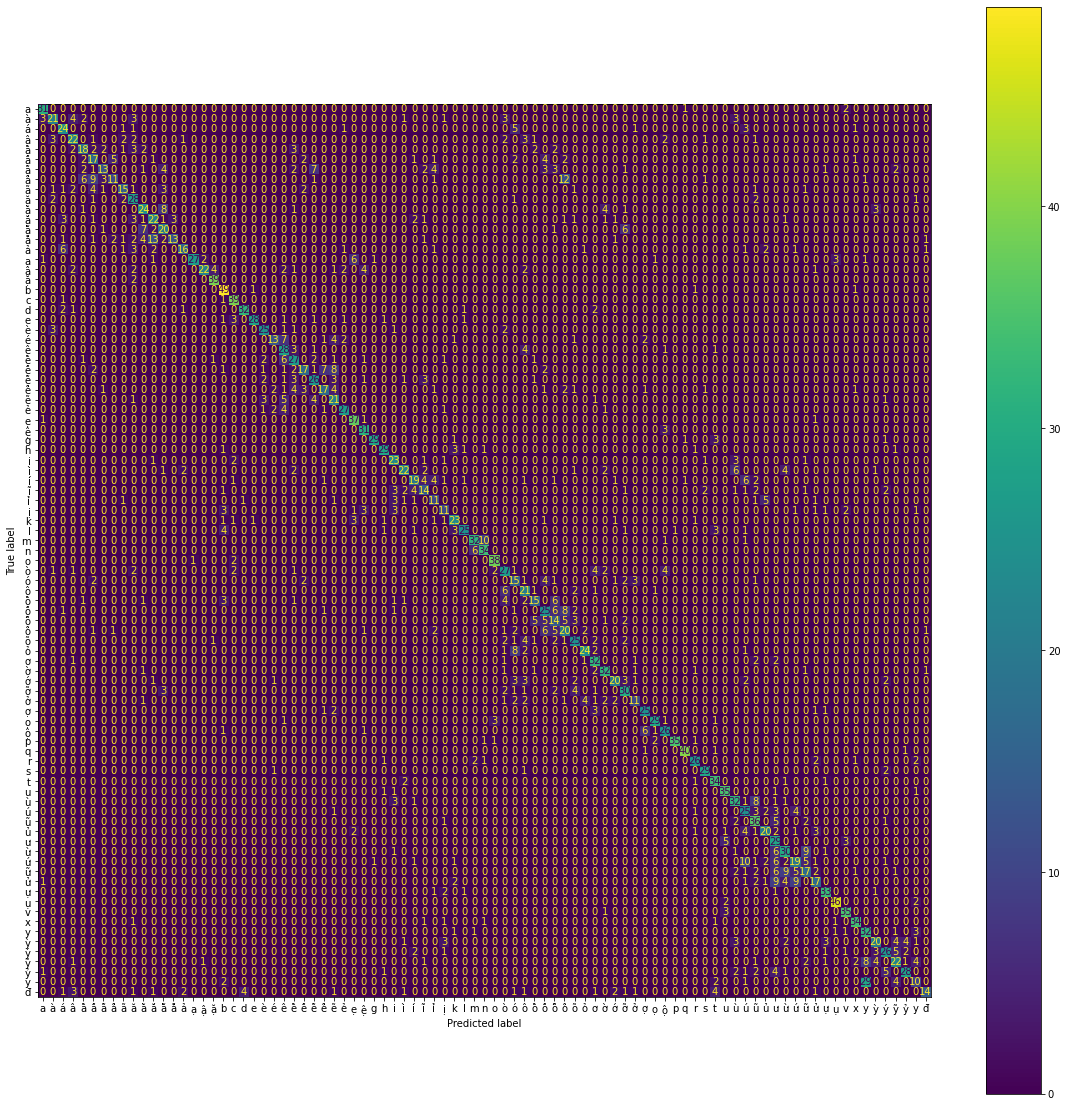

              precision    recall  f1-score   support

           a       0.82      0.91      0.86        34
          à       0.68      0.51      0.58        41
          á       0.60      0.65      0.62        37
          â       0.56      0.54      0.55        41
         ầ       0.55      0.49      0.51        37
         ấ       0.40      0.45      0.43        38
         ẫ       0.62      0.28      0.39        46
         ẩ       0.58      0.24      0.34        45
          ã       0.62      0.45      0.53        33
          ă       0.51      0.76      0.61        37
         ằ       0.57      0.57      0.57        42
         ắ       0.50      0.52      0.51        42
         ẵ       0.48      0.54      0.51        37
         ẳ       0.81      0.31      0.45        42
          ả       0.73      0.44      0.55        36
          ạ       0.96      0.63      0.76        43
         ậ       0.88      0.51      0.65        43
         ặ       0.87    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_LG,X_vali,Y_vali,display_labels=labels)
plt.show()
result = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(result)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_LG,X_test,Y_test,display_labels=labels)
plt.show()
result = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(result)

#Model Support Vector Machine(SVM)

> Sử dụng kernel linear



In [8]:
from sklearn.svm import SVC
model_SVM_linear = SVC(C=1000, kernel = 'linear', gamma=0.001)
model_SVM_linear.fit(X_train, Y_train)
y_pred_vali = model_SVM_linear.predict(X_vali)
y_pred_test = model_SVM_linear.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.6945878753107668




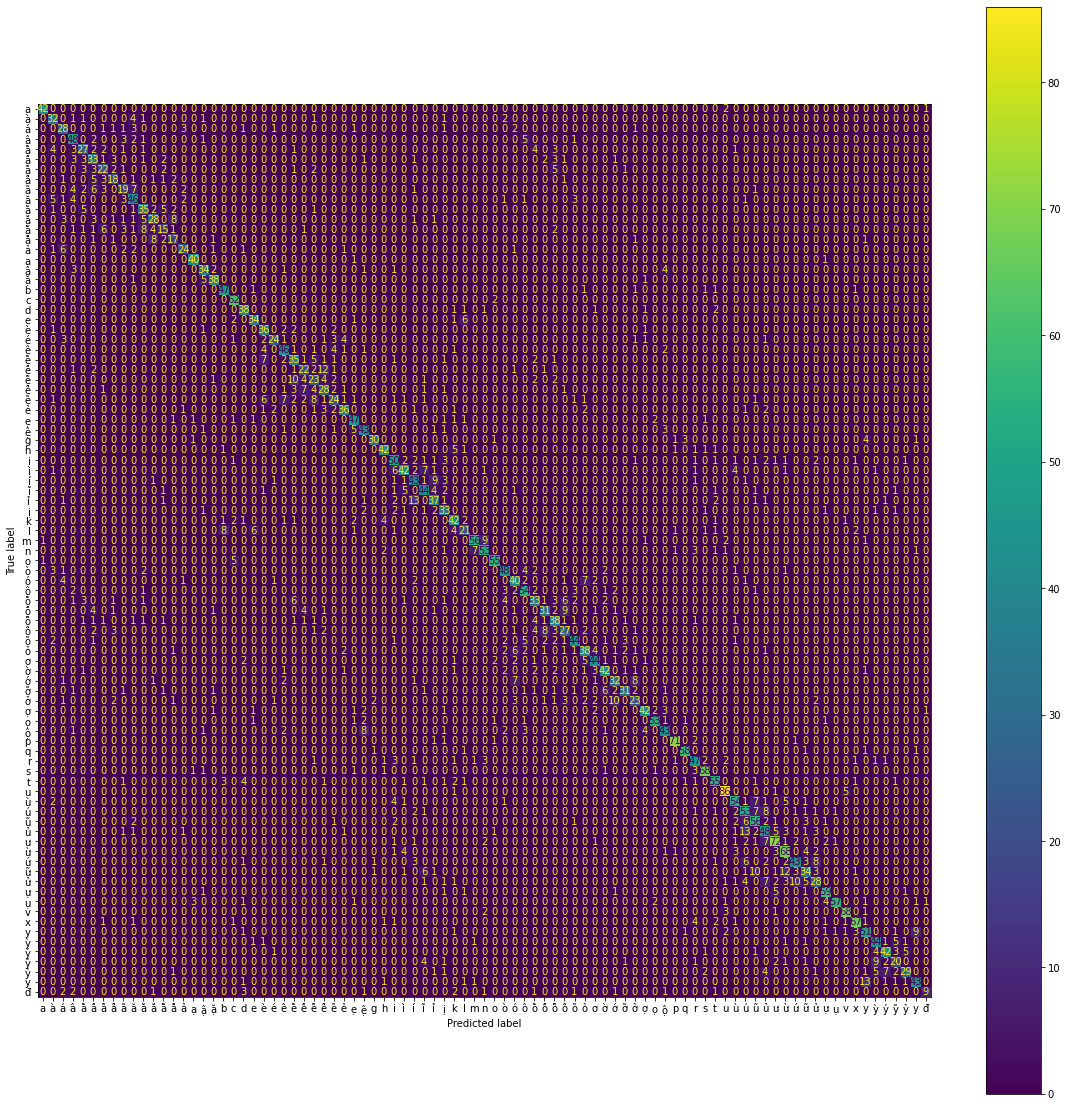

              precision    recall  f1-score   support

           a       0.95      0.93      0.94        45
          à       0.60      0.73      0.66        44
          á       0.54      0.64      0.58        44
          â       0.64      0.76      0.70        63
         ầ       0.57      0.55      0.56        49
         ấ       0.50      0.60      0.55        55
         ẫ       0.54      0.52      0.53        42
         ẩ       0.55      0.55      0.55        33
          ã       0.51      0.42      0.46        45
          ă       0.62      0.69      0.65        67
         ằ       0.61      0.67      0.64        52
         ắ       0.61      0.54      0.57        52
         ẵ       0.48      0.34      0.40        44
         ẳ       0.50      0.53      0.52        32
          ả       0.71      0.62      0.66        39
          ạ       0.87      0.95      0.91        42
         ậ       0.72      0.74      0.73        46
         ặ       0.83    

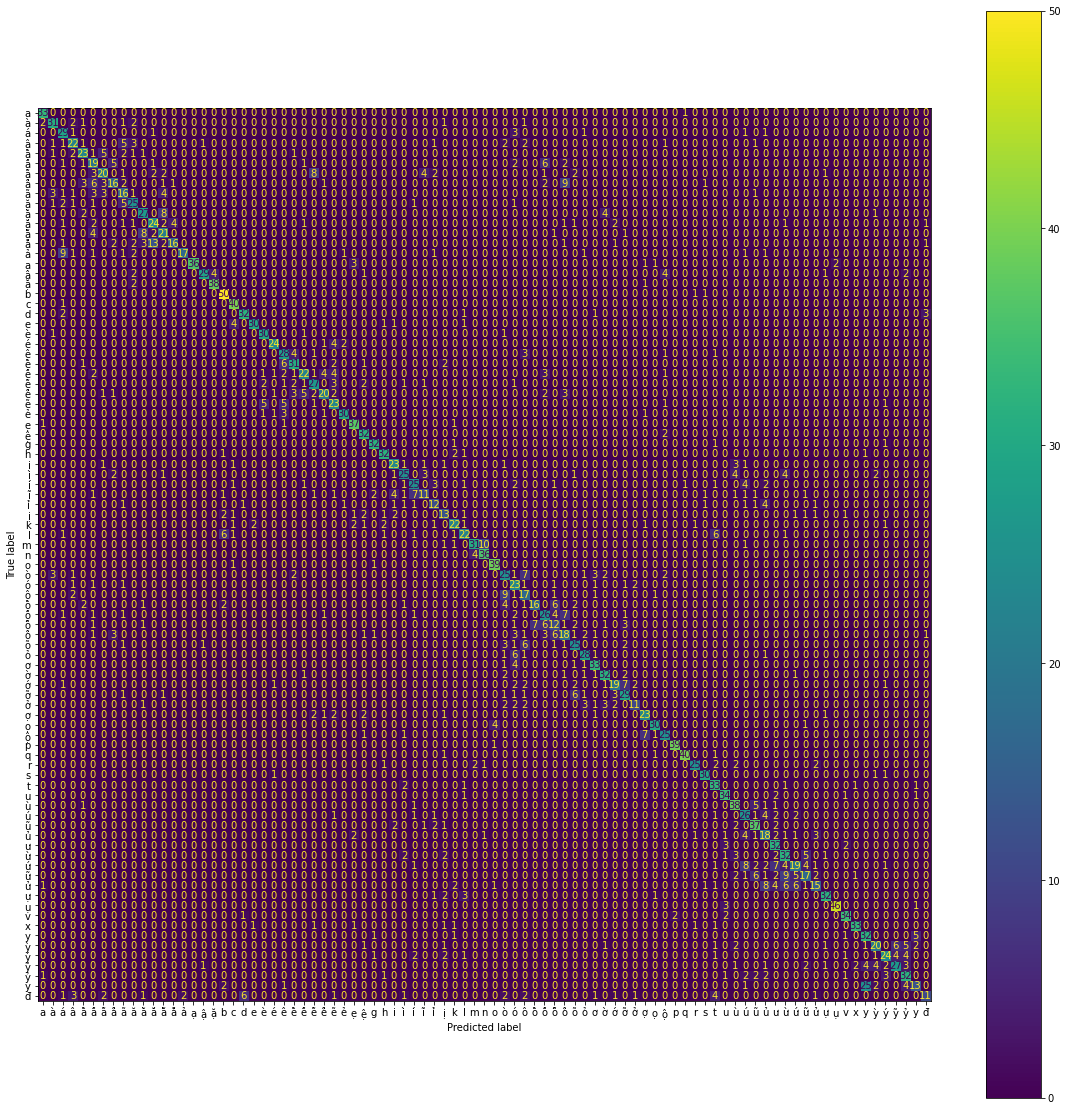

              precision    recall  f1-score   support

           a       0.87      0.97      0.92        34
          à       0.76      0.76      0.76        41
          á       0.56      0.78      0.65        37
          â       0.59      0.54      0.56        41
         ầ       0.66      0.62      0.64        37
         ấ       0.40      0.50      0.45        38
         ẫ       0.57      0.43      0.49        46
         ẩ       0.55      0.36      0.43        45
          ã       0.41      0.48      0.44        33
          ă       0.61      0.68      0.64        37
         ằ       0.63      0.64      0.64        42
         ắ       0.56      0.57      0.56        42
         ẵ       0.50      0.57      0.53        37
         ẳ       0.76      0.38      0.51        42
          ả       0.89      0.47      0.62        36
          ạ       1.00      0.84      0.91        43
         ậ       0.91      0.67      0.77        43
         ặ       0.90    

In [9]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_SVM_linear,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_SVM_linear,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

> Sử dụng kernel Polynomial



In [10]:
from sklearn.svm import SVC
model_SVM_poly = SVC(C=1000, kernel = 'poly', gamma=0.001)
model_SVM_poly.fit(X_train, Y_train)
y_pred_vali = model_SVM_poly.predict(X_vali)
y_pred_test = model_SVM_poly.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.18646012621916236




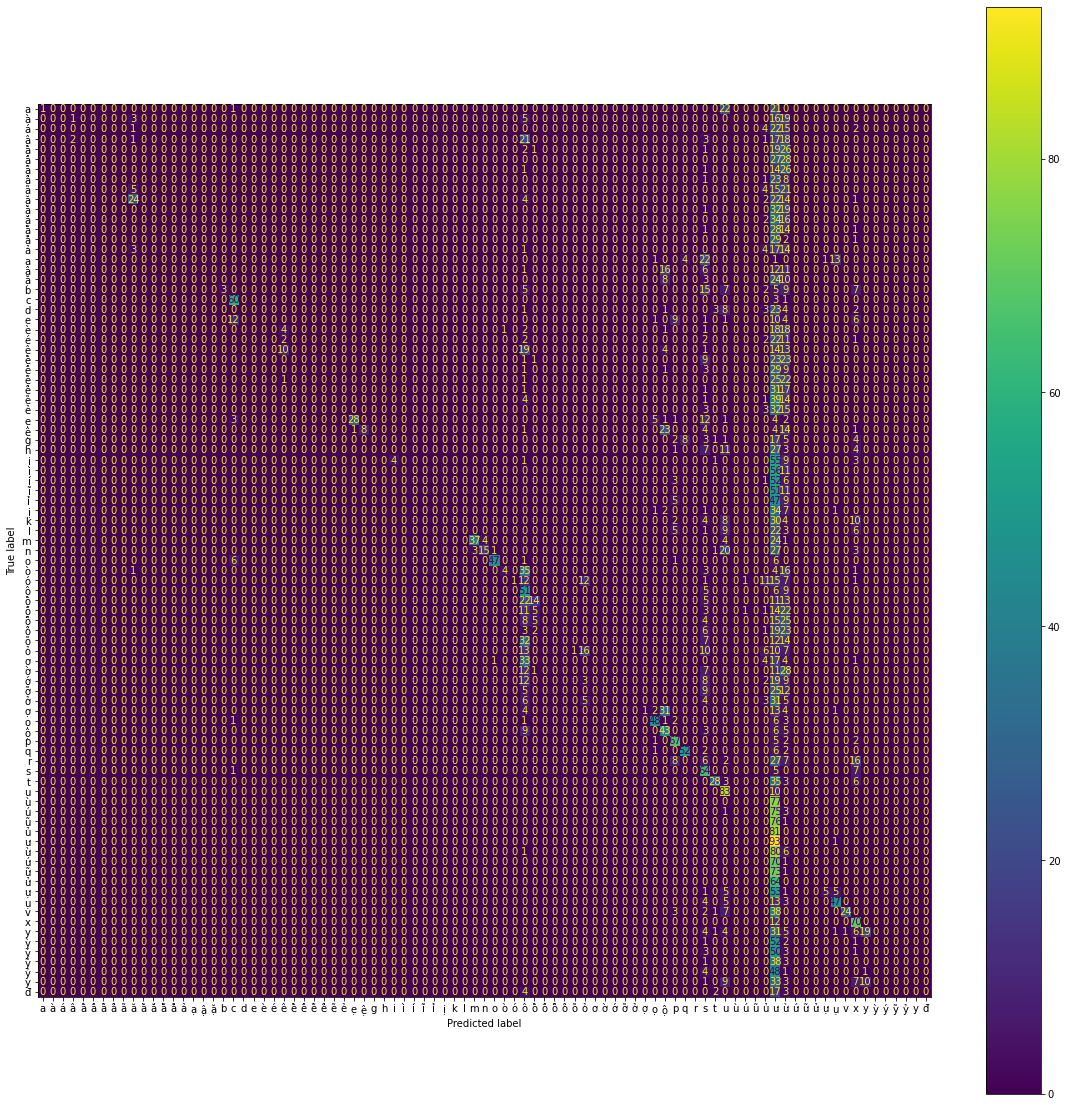

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           a       1.00      0.02      0.04        45
          à       0.00      0.00      0.00        44
          á       0.00      0.00      0.00        44
          â       0.67      0.03      0.06        63
         ầ       0.00      0.00      0.00        49
         ấ       0.00      0.00      0.00        55
         ẫ       0.00      0.00      0.00        42
         ẩ       0.00      0.00      0.00        33
          ã       0.00      0.00      0.00        45
          ă       0.63      0.36      0.46        67
         ằ       0.00      0.00      0.00        52
         ắ       0.00      0.00      0.00        52
         ẵ       0.00      0.00      0.00        44
         ẳ       0.00      0.00      0.00        32
          ả       0.00      0.00      0.00        39
          ạ       0.00      0.00      0.00        42
         ậ       0.00      0.00      0.00        46
         ặ       0.00    

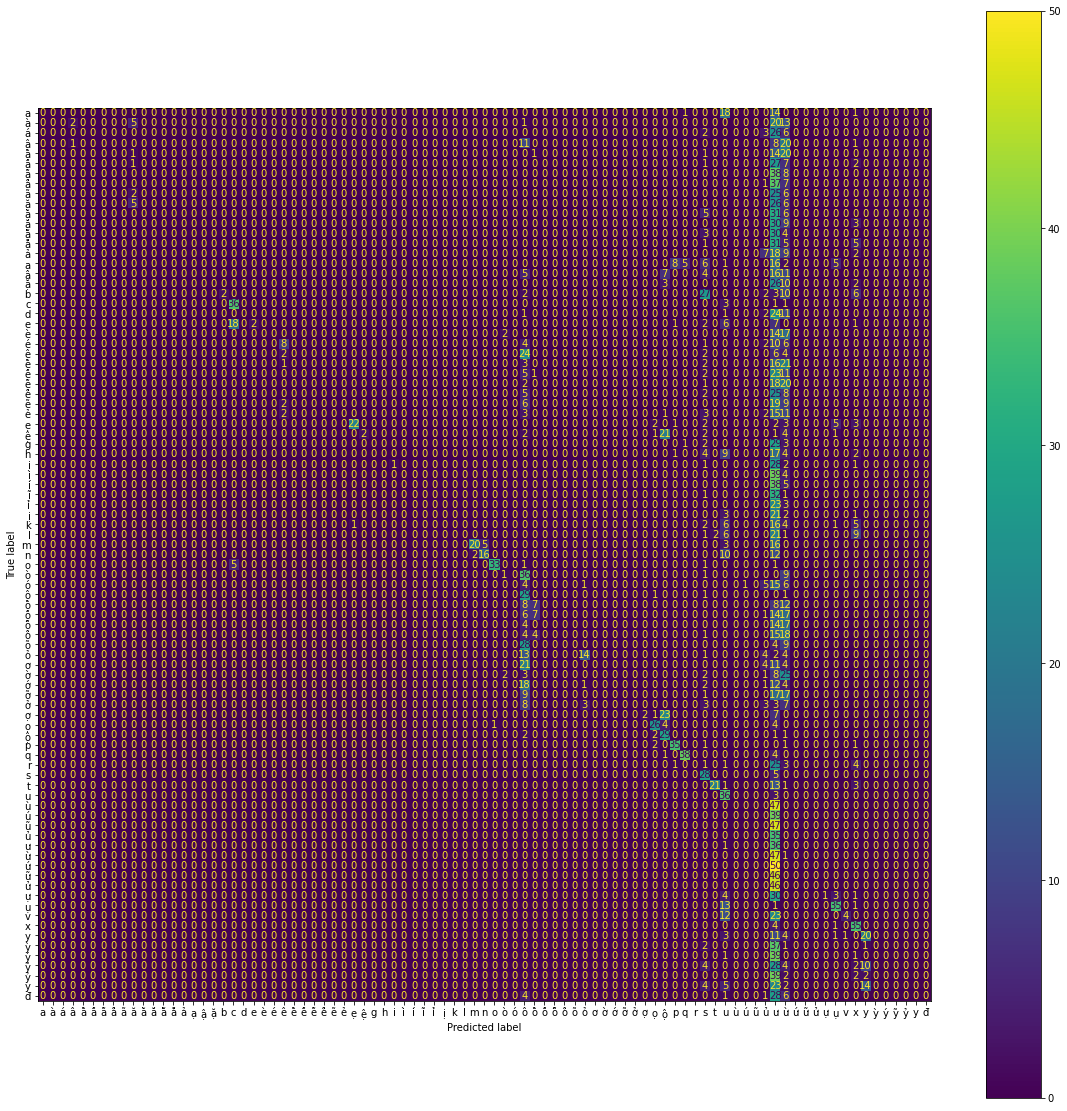

              precision    recall  f1-score   support

           a       0.00      0.00      0.00        34
          à       0.00      0.00      0.00        41
          á       0.00      0.00      0.00        37
          â       0.33      0.02      0.05        41
         ầ       0.00      0.00      0.00        37
         ấ       0.00      0.00      0.00        38
         ẫ       0.00      0.00      0.00        46
         ẩ       0.00      0.00      0.00        45
          ã       0.00      0.00      0.00        33
          ă       0.36      0.14      0.20        37
         ằ       0.00      0.00      0.00        42
         ắ       0.00      0.00      0.00        42
         ẵ       0.00      0.00      0.00        37
         ẳ       0.00      0.00      0.00        42
          ả       0.00      0.00      0.00        36
          ạ       0.00      0.00      0.00        43
         ậ       0.00      0.00      0.00        43
         ặ       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_SVM_poly,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_SVM_poly,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

> Sử dụng kernel rbf

In [6]:
from sklearn.svm import SVC
model_SVM_rbf = SVC(C=1000, kernel = 'rbf', gamma=0.001)
model_SVM_rbf.fit(X_train, Y_train)
y_pred_vali = model_SVM_rbf.predict(X_vali)
y_pred_test = model_SVM_rbf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Validation
Accuracy:  0.7012813157391471




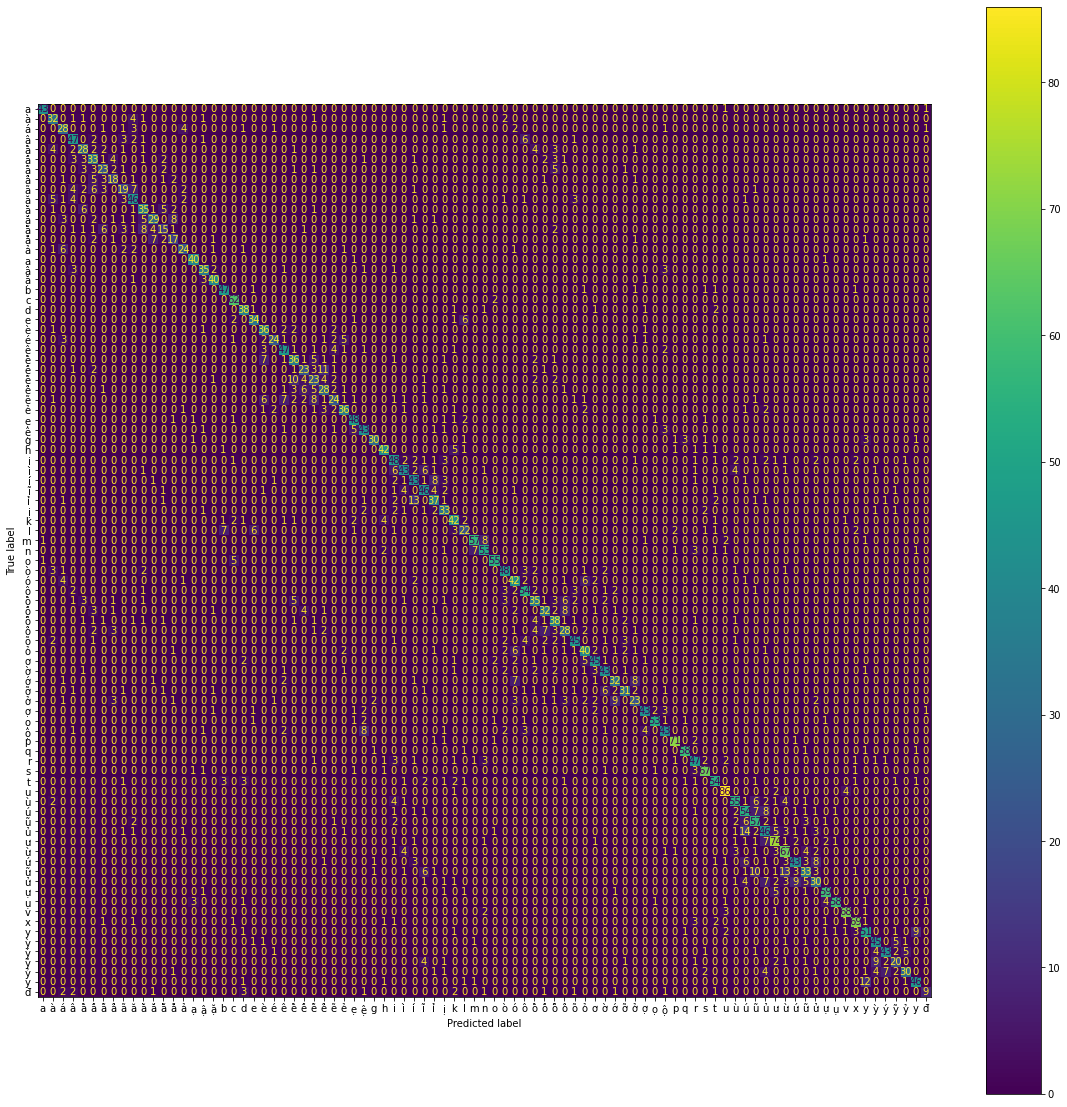

              precision    recall  f1-score   support

           a       0.96      0.96      0.96        45
          à       0.62      0.73      0.67        44
          á       0.54      0.64      0.58        44
          â       0.64      0.75      0.69        63
         ầ       0.57      0.57      0.57        49
         ấ       0.51      0.60      0.55        55
         ẫ       0.55      0.55      0.55        42
         ẩ       0.53      0.55      0.54        33
          ã       0.51      0.42      0.46        45
          ă       0.62      0.69      0.65        67
         ằ       0.60      0.67      0.64        52
         ắ       0.66      0.56      0.60        52
         ẵ       0.48      0.34      0.40        44
         ẳ       0.50      0.53      0.52        32
          ả       0.69      0.62      0.65        39
          ạ       0.87      0.95      0.91        42
         ậ       0.76      0.76      0.76        46
         ặ       0.83    

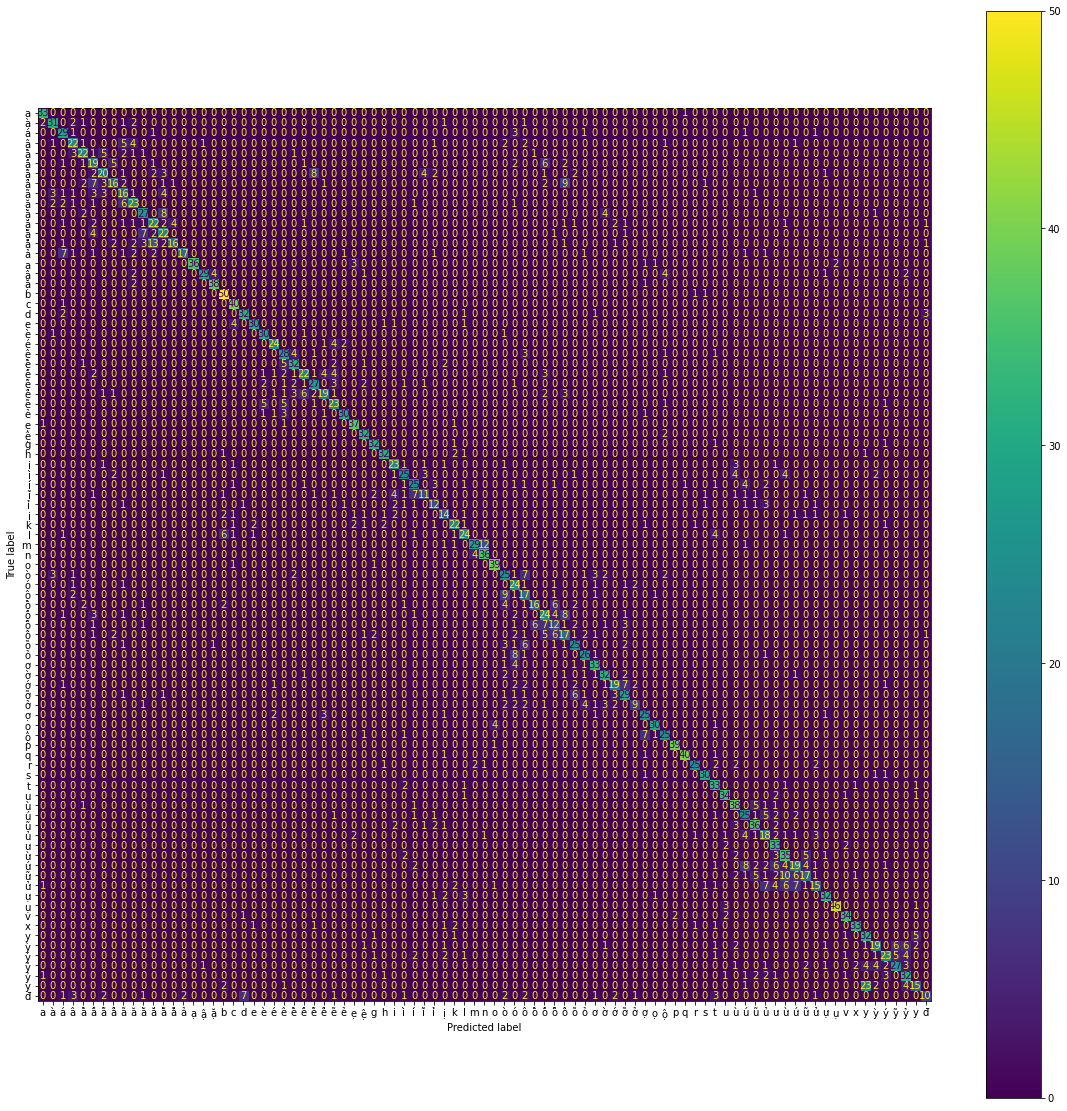

              precision    recall  f1-score   support

           a       0.87      0.97      0.92        34
          à       0.76      0.76      0.76        41
          á       0.59      0.78      0.67        37
          â       0.58      0.54      0.56        41
         ầ       0.67      0.59      0.63        37
         ấ       0.40      0.50      0.44        38
         ẫ       0.57      0.43      0.49        46
         ẩ       0.57      0.36      0.44        45
          ã       0.40      0.48      0.44        33
          ă       0.57      0.62      0.60        37
         ằ       0.63      0.64      0.64        42
         ắ       0.51      0.52      0.52        42
         ẵ       0.50      0.59      0.54        37
         ẳ       0.76      0.38      0.51        42
          ả       0.89      0.47      0.62        36
          ạ       1.00      0.84      0.91        43
         ậ       0.94      0.67      0.78        43
         ặ       0.88    

In [7]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_SVM_rbf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_SVM_rbf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

#**Model MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
Y_vali = Y_vali.ravel()
Y_train

array([ 0,  0,  0, ..., 88, 88, 88])

In [ ]:
model_MLP = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000), max_iter=500)
model_MLP.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 1000, 1000), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred_vali = model_MLP.predict(X_vali)
y_pred_test = model_MLP.predict(X_test)

	Validation
Accuracy:  0.7091222030981067




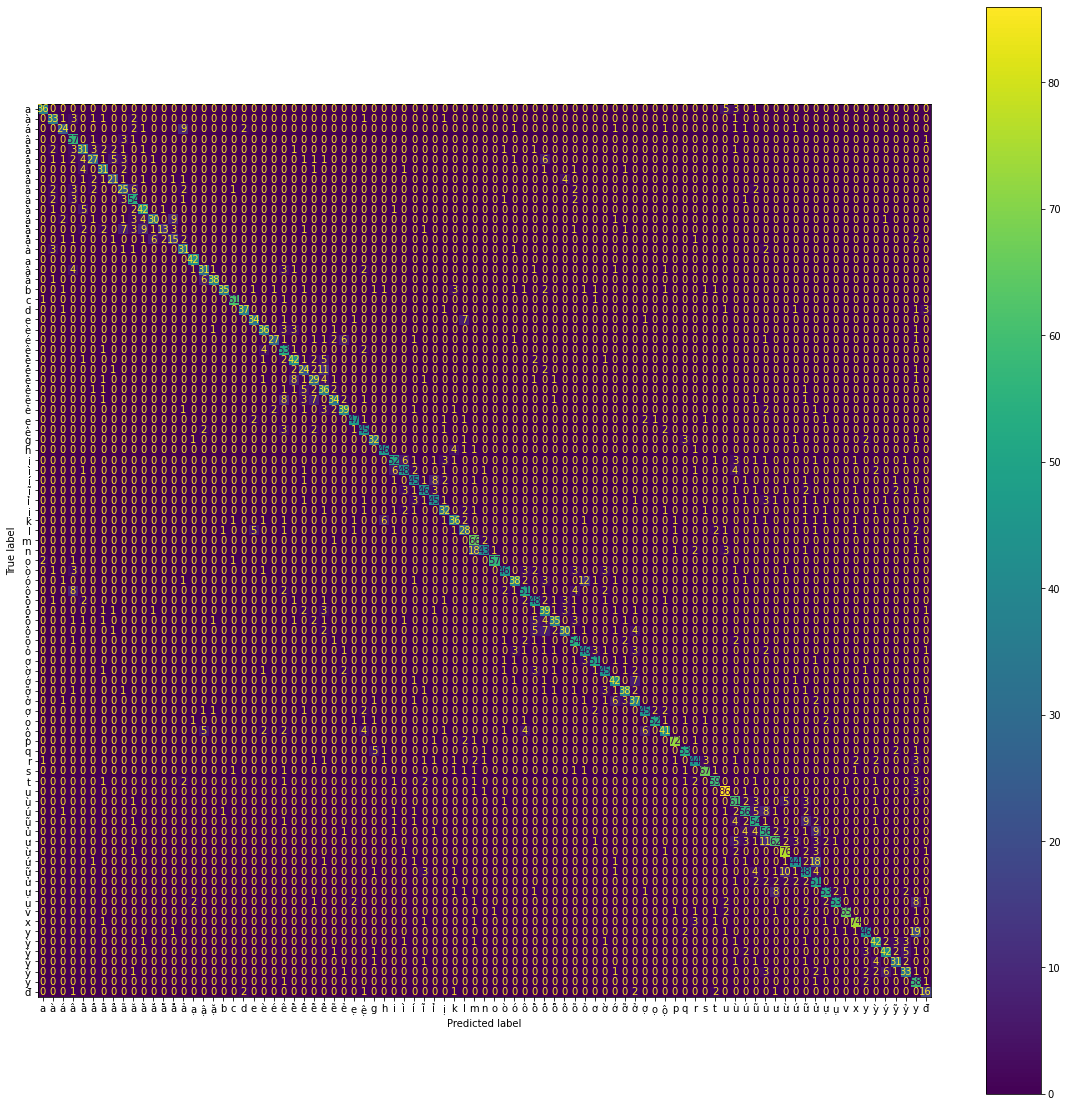

              precision    recall  f1-score   support

           a       0.89      0.91      0.90        45
          à       0.63      0.59      0.61        44
          á       0.59      0.59      0.59        44
          â       0.73      0.76      0.74        63
         ầ       0.58      0.51      0.54        49
         ấ       0.58      0.62      0.60        55
         ẫ       0.63      0.64      0.64        42
         ẩ       0.54      0.61      0.57        33
          ã       0.52      0.38      0.44        45
          ă       0.66      0.72      0.69        67
         ằ       0.64      0.67      0.65        52
         ắ       0.58      0.60      0.59        52
         ẵ       0.51      0.41      0.46        44
         ẳ       0.47      0.44      0.45        32
          ả       0.73      0.69      0.71        39
          ạ       0.86      1.00      0.92        42
         ậ       0.79      0.72      0.75        46
         ặ       0.79    

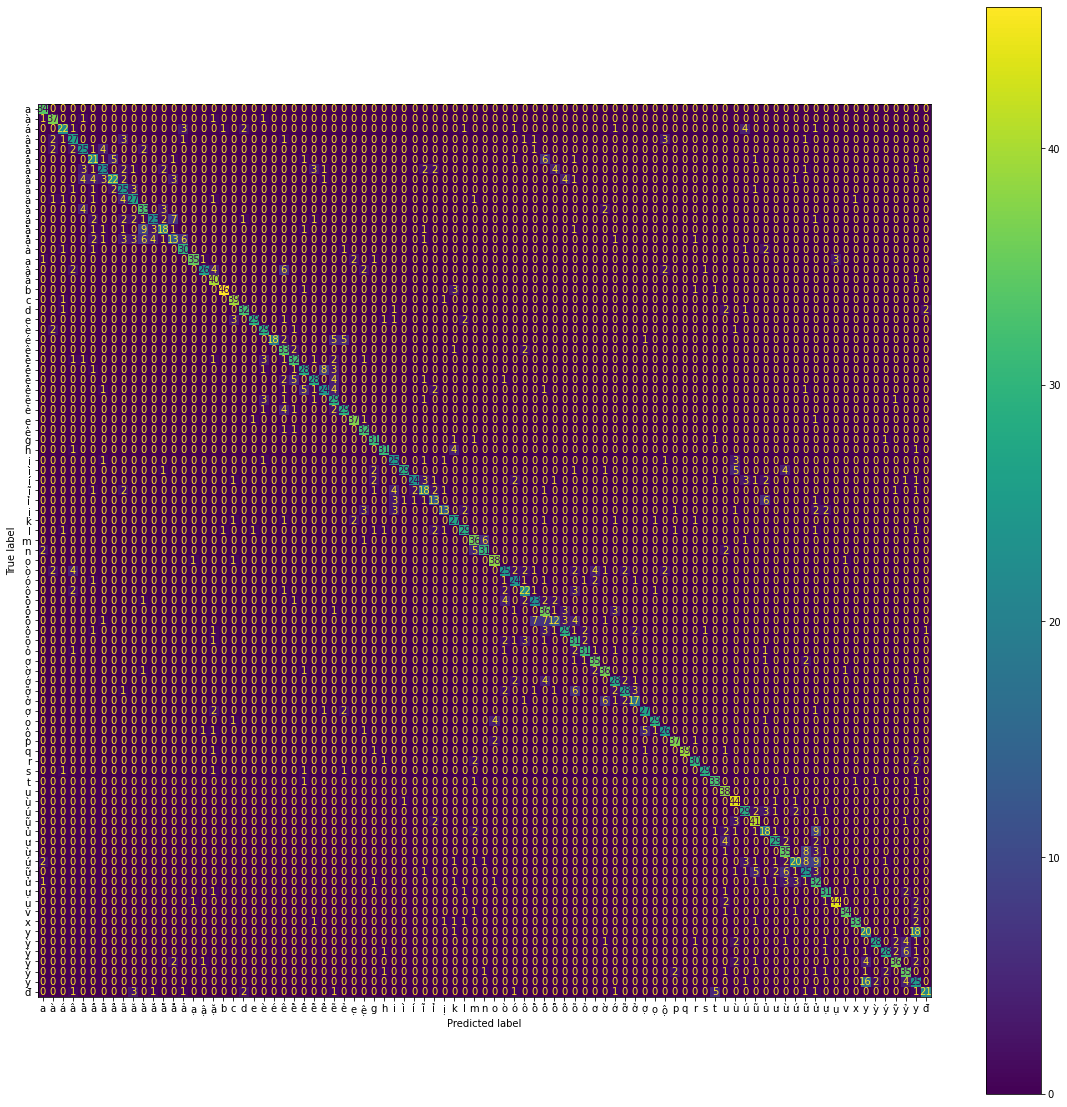

              precision    recall  f1-score   support

           a       0.82      0.97      0.89        34
          à       0.75      0.66      0.70        41
          á       0.59      0.70      0.64        37
          â       0.70      0.56      0.62        41
         ầ       0.70      0.57      0.63        37
         ấ       0.43      0.58      0.49        38
         ẫ       0.58      0.48      0.52        46
         ẩ       0.67      0.36      0.46        45
          ã       0.57      0.48      0.52        33
          ă       0.70      0.76      0.73        37
         ằ       0.71      0.64      0.67        42
         ắ       0.50      0.52      0.51        42
         ẵ       0.47      0.57      0.51        37
         ẳ       0.72      0.43      0.54        42
          ả       0.85      0.61      0.71        36
          ạ       0.95      0.88      0.92        43
         ậ       0.91      0.67      0.77        43
         ặ       0.79    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_MLP,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_MLP,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)